In [1]:
#import Pkg; Pkg.add("PyCall")
#import Pkg; Pkg.add("PyPlot")
using PyCall
using PyPlot
np = pyimport("numpy")
io = pyimport("skimage.io")
pylab = pyimport("pylab")
pylab.rcParams["figure.figsize"] = (8.0, 10.0)

(8.0, 10.0)

In [2]:
py"""
import sys
sys.path.insert(0, "./")
"""

pycocotools_coco = pyimport("pycocotools.coco")

PyObject <module 'pycocotools.coco' from './pycocotools/coco.py'>

In [3]:
dataDir="/datasets/COCO/"
dataType="val2017"
annFile="$dataDir/annotations/instances_$dataType.json"

"/datasets/COCO//annotations/instances_val2017.json"

In [4]:
# initialize COCO api for instance annotations
coco = pycocotools_coco.COCO(annFile)

PyObject <pycocotools.coco.COCO object at 0x2aef95f05c18>

In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat["name"] for cat in cats]
print("COCO categories: \n$nms\n")

nms = [cat["supercategory"] for cat in cats]
print("COCO supercategories: \n$nms")

COCO categories: 
["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
COCO supercategories: 
["person", "vehicle", "vehicle", "vehicle", "vehicle", "vehicle", "vehicle", "vehicle", "vehicle"

In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=["person","dog","skateboard"]);
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(1,length(imgIds))])[1]

Dict{Any,Any} with 8 entries:
  "file_name"     => "000000324158.jpg"
  "height"        => 334
  "id"            => 324158
  "width"         => 500
  "license"       => 1
  "date_captured" => "2013-11-19 23:54:06"
  "flickr_url"    => "http://farm1.staticflickr.com/169/417836491_5bf8762150_z.…
  "coco_url"      => "http://images.cocodataset.org/val2017/000000324158.jpg"

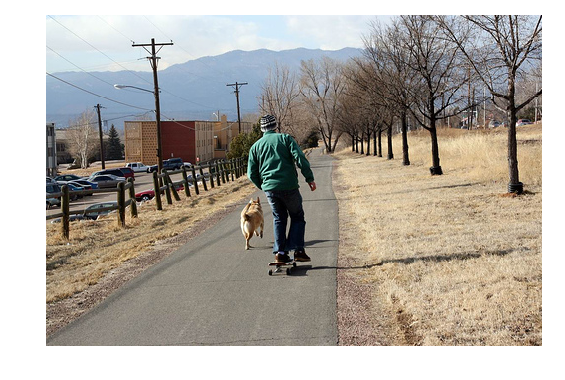

In [7]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img["coco_url"])
plt.switch_backend("agg")
plt.axis("off")
plt.imshow(I)
plt.show()

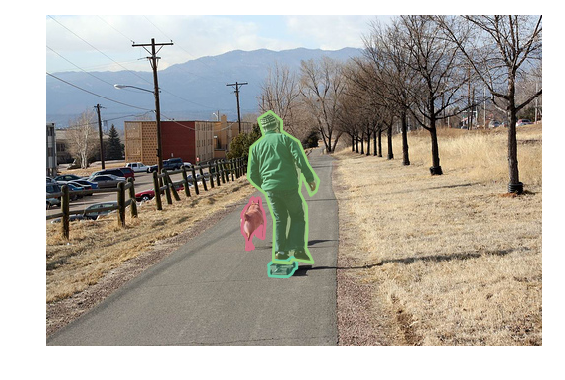

In [9]:
# load and display instance annotations

annIds = coco.getAnnIds(imgIds=img["id"], catIds=catIds, iscrowd=nothing)
anns = coco.loadAnns(annIds)
ann = anns[1]
plt.imshow(I); plt.axis("off")
coco.showAnns(anns)